# Fuzzy C-Means (FCM) Clustering
"Fuzzy" means "not sure" indicating that it's a soft clustering method. "C-Means" means $c$ cluster centers, which only replaces the $k$ in "K-Means" with a $c$ to make it look different.

In a clustering algorithm, if the probability of one data point belonging to a cluster can only take the value of 1 or 0, it’s hard clustering. The boundary of a cluster in a hard clustering method can be visualized as a crisp boundary. On the contrary, in a soft clustering method, the probability of one data point belonging to a cluster can take any value between 0 and 1, such as 75%, for which the boundary of a cluster can be visualized as a fuzzy boundary.

<br>

<div style="align:center">
    <img src="media/fuzzy.png">
</div>

In the Fuzzy c-means (FCM) clustering method, we have two parameters, $\mu_{ij}$ and $c_i$, and one hyperparameter, $m$.

$\mu_{ij}$, membership value, is the probability that the $j$th data point belongs to the $i$th cluster, and it is constrained to that the sum of $\mu_{ij}$ over $C$ cluster centers is 1 for every data point $j$. $c_i$ is the center of the $i$th cluster (the same dimension with $X$). And $m$ is the fuzzifier, which controls how fuzzy the cluster boundary should be.

<div style="align:center">
    <img src="media/fuzzy1.png" width=400>
</div>

## Objective Function

$$J = \sum_{i=1}^c \sum_{j=1}^N \mu_{ij}^m ||x_j - c_i||^2 $$

- Step 1: Random Assign Membership Values
- Step 2: Calculate Fuzzy Centroids
- Step 3: Adjust Membership Values
- Step 4: Repeat Until Stabilization

<br>

- **Strength:** Produces a clustering that provides an indication of the degree to which any point belongs to any cluster.
- **Weakness:** Computationally more intensive than k-means

Otherwise, it has same strengths and weaknesses as K-means.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import skfuzzy as fuzz

In [9]:
iris = datasets.load_iris()
data = iris.data

In [10]:
n_clusters = 3

# Fuzzy c-means algorithm
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T, n_clusters, 2, error=0.005, maxiter=1000)

# Assign each data point to the cluster with the highest membership value
cluster_membership = np.argmax(u, axis=0)

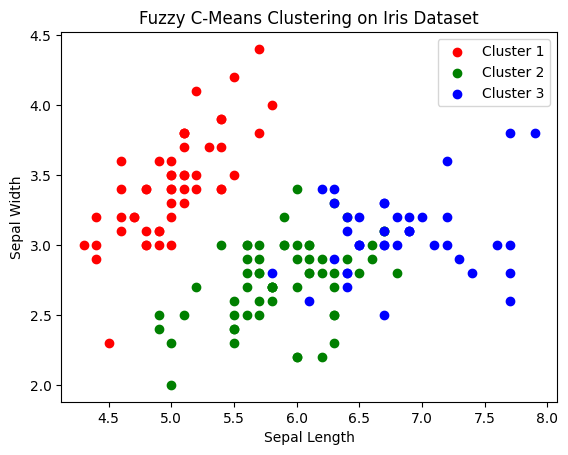

In [11]:
# Plotting the results
fig, ax = plt.subplots()
colors = ['r', 'g', 'b']
for j in range(n_clusters):
    ax.scatter(data[cluster_membership == j, 0], data[cluster_membership == j, 1],
               c=colors[j], label=f'Cluster {j + 1}', marker='o')

ax.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Fuzzy C-Means Clustering on Iris Dataset')
plt.show()